1. Tree-based models (very popular, often best starting point)  
	•	Random Forest (good baseline, very robust)  
	Gradient Boosting models:  
	•	XGBoost  
	•	LightGBM  
	•	CatBoost (good if you have categorical variables, not your case but still strong)  

In [8]:
import pandas as pd

# Load balanced dataset
df_smote = pd.read_csv('df_smote.csv')

# Separate features and target
X = df_smote.drop('Label', axis=1)
y = df_smote['Label']


In [9]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Decision Tree Classification Report:
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.35      0.34      0.35       200
                 BENIGN       0.30      0.32      0.31       200
       BROWSERHIJACKING       0.44      0.44      0.44       200
       COMMANDINJECTION       0.40      0.41      0.41       200
 DDOS-ACK_FRAGMENTATION       0.99      0.99      0.99       200
        DDOS-HTTP_FLOOD       0.78      0.80      0.79       200
        DDOS-ICMP_FLOOD       1.00      0.99      1.00       200
DDOS-ICMP_FRAGMENTATION       0.98      0.98      0.98       200
      DDOS-PSHACK_FLOOD       0.99      0.98      0.99       200
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       200
         DDOS-SLOWLORIS       0.86      0.91      0.88       200
DDOS-SYNONYMOUSIP_FLOOD       0.44      0.45      0.44       200
         DDOS-SYN_FLOOD       0.41      0.41      0.41       200
         DDOS-TCP_FLOOD       0.60      0.59      0.

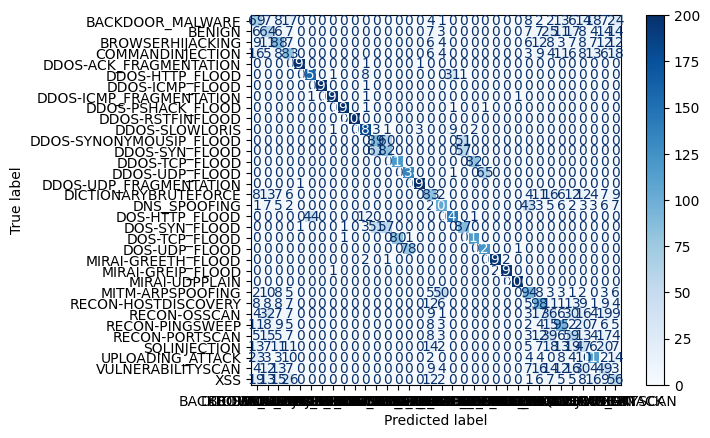

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Blues')

Random Forest Classification Report:
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.60      0.53      0.56       200
                 BENIGN       0.37      0.54      0.44       200
       BROWSERHIJACKING       0.48      0.46      0.47       200
       COMMANDINJECTION       0.57      0.46      0.51       200
 DDOS-ACK_FRAGMENTATION       0.99      0.99      0.99       200
        DDOS-HTTP_FLOOD       0.84      0.82      0.83       200
        DDOS-ICMP_FLOOD       0.99      0.99      0.99       200
DDOS-ICMP_FRAGMENTATION       1.00      0.99      0.99       200
      DDOS-PSHACK_FLOOD       0.99      0.99      0.99       200
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       200
         DDOS-SLOWLORIS       0.88      0.97      0.93       200
DDOS-SYNONYMOUSIP_FLOOD       0.44      0.44      0.44       200
         DDOS-SYN_FLOOD       0.41      0.41      0.41       200
         DDOS-TCP_FLOOD       0.61      0.58      0.

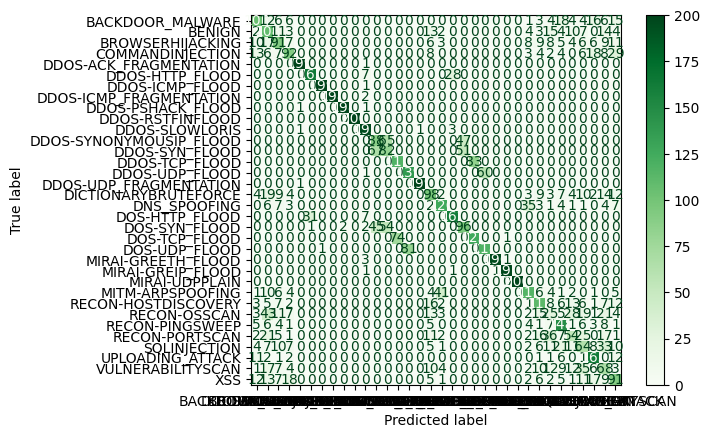

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')


c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       200
           1       0.39      0.56      0.46       200
           2       0.53      0.49      0.51       200
           3       0.47      0.45      0.46       200
           4       0.98      0.99      0.99       200
           5       0.85      0.81      0.83       200
           6       1.00      0.99      1.00       200
           7       1.00      0.99      0.99       200
           8       1.00      0.98      0.99       200
           9       1.00      1.00      1.00       200
          10       0.90      0.98      0.94       200
          11       0.47      0.60      0.53       200
          12       0.44      0.37      0.40       200
          13       0.63      0.65      0.64       200
          14       0.66      0.74      0.70       200
          15       0.99      0.99      0.99       200
          16       0.51      0.53      0.52       

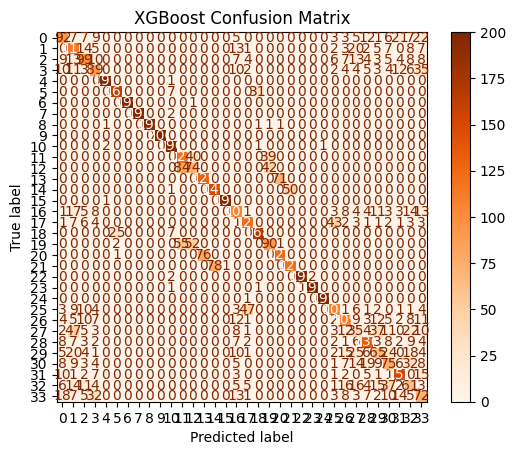

In [14]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load balanced dataset
df_smote = pd.read_csv('df_smote.csv')
X = df_smote.drop('Label', axis=1)
y = df_smote['Label']

# FIX: Label encode y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()


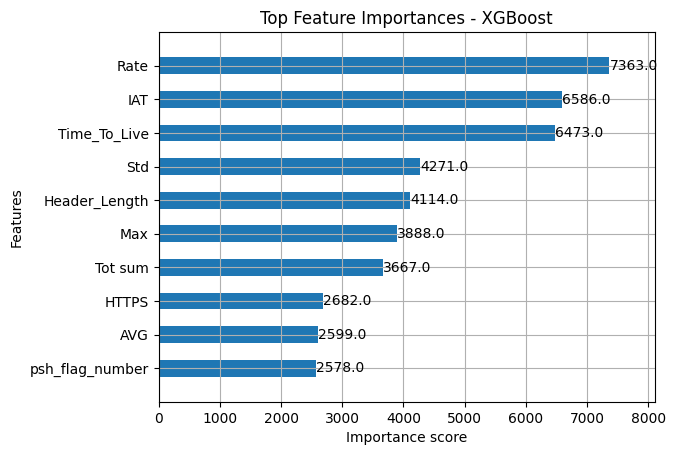

In [15]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Show top 10 most important features
xgb.plot_importance(xgb_model, max_num_features=10, height=0.5)
plt.title("Top Feature Importances - XGBoost")
plt.show()


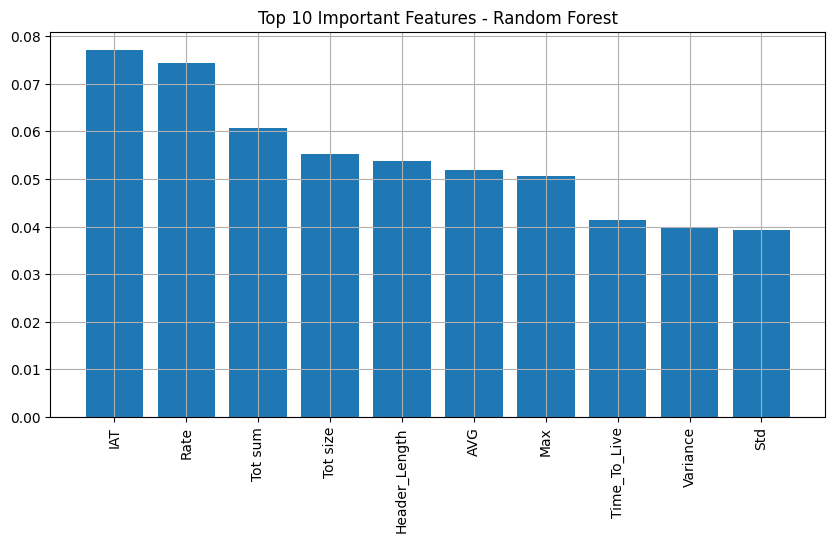

In [12]:
import matplotlib.pyplot as plt

# Get top 10 features by importance
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,5))
plt.bar(feat_df['Feature'][:10], feat_df['Importance'][:10])
plt.xticks(rotation=90)
plt.title('Top 10 Important Features - Random Forest')
plt.grid()
plt.show()
